In [125]:
cd /media/sf_Box_Sync/Hyperlactemia\ sepsis\ project_jinghe/Data/

/media/sf_Box_Sync/Hyperlactemia sepsis project_jinghe/Data


In [126]:
# analyze how often are lactates checked?
import pandas as pd
import numpy as np

data_df2_3a = pd.read_csv('data_df2.3a.csv', header = False)
data_df2_3a = pd.DataFrame(data_df2_3a)
data_df2_3a.head()


,id,charttime,itemid,valuenum
0,1003#%#1#%#1,3235-02-14 06:48:00,50010,3.8
1,1003#%#1#%#1,3235-02-14 06:48:00,818,3.8
2,1003#%#1#%#1,3235-02-14 16:01:00,50010,5.4
3,1003#%#1#%#1,3235-02-14 16:01:00,818,5.4
4,1003#%#1#%#1,3235-02-14 22:04:00,50010,6.7


In [127]:
data_df2_3a.columns = ['id', 'charttime', 'itemid', 'valuenum']
data_df2_3a_2 = data_df2_3a.drop_duplicates(['id', 'charttime'])
data_df2_3a_2.head()

,id,charttime,itemid,valuenum
0,1003#%#1#%#1,3235-02-14 06:48:00,50010,3.8
2,1003#%#1#%#1,3235-02-14 16:01:00,50010,5.4
4,1003#%#1#%#1,3235-02-14 22:04:00,50010,6.7
6,1003#%#1#%#1,3235-02-15 00:37:00,50010,6.4
8,1003#%#1#%#1,3235-02-16 07:55:00,50010,6.7


In [128]:
data_df2_3a_2_by_id = data_df2_3a_2.groupby('id')

import datetime
import matplotlib.pyplot as plt

diff_per_pt = []
diff_per_pt_high = []
diff_per_pt_low = []
pair_first = []
pair_first_low = []
for name, group in data_df2_3a_2_by_id:
    lines=group.values.tolist()

    for i in range(len(lines)-1):
        first = datetime.datetime.strptime(lines[i][1], '%Y-%m-%d %H:%M:%S')
        first_lac = lines[i][3]
        second = datetime.datetime.strptime(lines[i+1][1], '%Y-%m-%d %H:%M:%S')
        second_lac = lines[i+1][3]
        
        diff = second - first
        diff = diff.total_seconds()/3600
        if diff > 50:
            continue
        else:  
            diff_per_pt.append(diff)
            pair_first.append(first_lac)

            if first_lac < 4:
                diff_per_pt_low.append(diff)
            else:
                diff_per_pt_high.append(diff)         

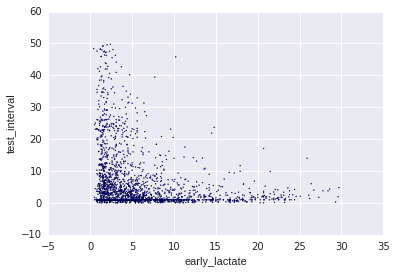

In [129]:
# draw a scatter plot for lactate_early vs. test interval
data = np.array([diff_per_pt, pair_first])
df = pd.DataFrame(data.T, columns = ['test_interval', 'early_lactate'])
df.plot(kind='scatter', x='early_lactate', y='test_interval',c='b', s=1)


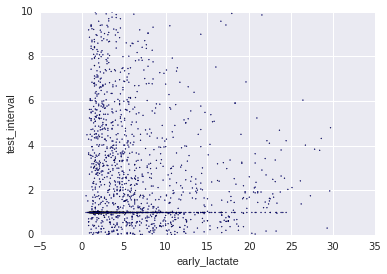

In [130]:
# draw a scatter plot for lactate_early vs. test interval
df.plot(kind='scatter', x='early_lactate', y='test_interval',c='b', s=1, ylim = (0,10))

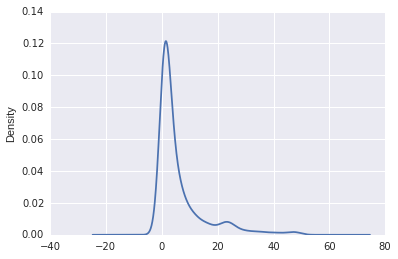

In [131]:
%matplotlib inline

diff_per_pt_pd = pd.Series(diff_per_pt)
diff_per_pt_pd.describe()

plt.figure()
diff_per_pt_pd.plot(kind='density')
plt.show()

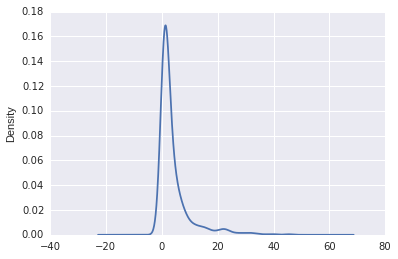

In [132]:
diff_per_pt_high_pd = pd.Series(diff_per_pt_high)
diff_per_pt_high_pd.describe()
plt.figure()
diff_per_pt_high_pd.plot(kind='density')
plt.show()

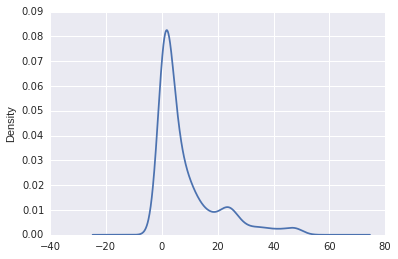

In [133]:
diff_per_pt_low_pd = pd.Series(diff_per_pt_low)
diff_per_pt_low_pd.describe()
plt.figure()
diff_per_pt_low_pd.plot(kind='density')
plt.show()

In [134]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

def getmeasurementgaps(filename):
    data_df2_3a = pd.read_csv(filename, header = False)
    data_df2_3a = pd.DataFrame(data_df2_3a)
    data_df2_3a.head()
    data_df2_3a.columns = ['id', 'charttime', 'itemid', 'valuenum']
    data_df2_3a_2 = data_df2_3a.drop_duplicates(['id', 'charttime'])
    data_df2_3a_2.head()
    data_df2_3a_2_by_id = data_df2_3a_2.groupby('id')


    diff_per_pt = []
    diff_per_pt_high = []
    diff_per_pt_low = []
    pair_first = []
    for name, group in data_df2_3a_2_by_id:
        lines=group.values.tolist()

        for i in range(len(lines)-1):
            first = datetime.datetime.strptime(lines[i][1], '%Y-%m-%d %H:%M:%S')
            first_lac = lines[i][3]
            second = datetime.datetime.strptime(lines[i+1][1], '%Y-%m-%d %H:%M:%S')
            second_lac = lines[i+1][3]

            diff = second - first
            diff = diff.total_seconds()/3600
            if diff > 50:
                continue
            else:  
                diff_per_pt.append(diff)
                pair_first.append(first_lac)

                if first_lac < 4:
                    diff_per_pt_low.append(diff)
                else:
                    diff_per_pt_high.append(diff)    
    return [diff_per_pt, diff_per_pt_high, diff_per_pt_low, pair_first]                    

In [135]:
def plots(diff_per_pt, diff_per_pt_high, diff_per_pt_low):
    %matplotlib inline

    diff_per_pt_pd = pd.Series(diff_per_pt)
    diff_per_pt_pd.describe()
#     plt.figure()
#     diff_per_pt_pd.plot(kind='density', title = 'how often are lactates measured? - all')
#     plt.show()

    diff_per_pt_high_pd = pd.Series(diff_per_pt_high)
    diff_per_pt_high_pd.describe()
#     plt.figure()
#     diff_per_pt_high_pd.plot(kind='density', title = 'how often are lactates measured? - high lactate')
#     plt.show()

    diff_per_pt_low_pd = pd.Series(diff_per_pt_low)
    diff_per_pt_low_pd.describe()
#     plt.figure()
#     diff_per_pt_low_pd.plot(kind='density', title = 'how often are lactates measured? - low lactate')
#     plt.show()
    
    bins1 = range(0,60,1)
    plt.figure()
    plt.hist([diff_per_pt, diff_per_pt_low, diff_per_pt_high], bins1, stacked=True, color=['black', 'green', 'red'], label=['all', 'low_lac', 'high_lac'])
    plt.legend()
    plt.show()
    
    bins2 = np.arange(0,20,0.5)
    plt.figure()
    plt.hist([diff_per_pt, diff_per_pt_low, diff_per_pt_high], bins2, stacked=True, color=['black', 'green', 'red'], label=['all', 'low_lac', 'high_lac'])
    plt.legend()
    plt.show()


    plt.figure()
    diff_per_pt_pd.plot(kind='density', c = 'black', label='all')
    diff_per_pt_low_pd.plot(kind='density', c = 'green', label='low_lac')
    diff_per_pt_high_pd.plot(kind='density', c = 'red', label='high_lac')
    plt.legend()
    plt.show()
    
    plt.figure()
    diff_per_pt_pd.plot(kind='density', c = 'black', label='all', xlim=(0,30))
    diff_per_pt_low_pd.plot(kind='density', c = 'green', label='low_lac', xlim=(0,30))
    diff_per_pt_high_pd.plot(kind='density', c = 'red', label='high_lac', xlim=(0,30))
    plt.legend()
    plt.show()

    return [diff_per_pt_pd, diff_per_pt_high_pd, diff_per_pt_low_pd]

In [136]:
def lactate_freq_analysis(filename):
    diff_per_pt_all = getmeasurementgaps(filename)
    diff_per_pt_all_pd = plots(diff_per_pt_all[0], diff_per_pt_all[1], diff_per_pt_all[2])
    
    print 'how often are lactates measured? - all:'
    print diff_per_pt_all_pd[0].describe()

    print 'how often are lactates measured? - high lactate:'
    print diff_per_pt_all_pd[0].describe()

    print 'how often are lactates measured? - low lactate:'
    print diff_per_pt_all_pd[0].describe()
    
    # draw a scatter plot for lactate_early vs. test interval
    data = np.array([diff_per_pt_all[0], diff_per_pt_all[3]])
    df = pd.DataFrame(data.T, columns = ['test_interval', 'early_lactate'])
    df.plot(kind='scatter', x='early_lactate', y='test_interval',c='b', s=1, xlim = (0,30), title = 'early_lactate vs. test_interval (hr)')
    df.plot(kind='scatter', x='early_lactate', y='test_interval',c='b', s=1, xlim = (0,30), ylim = (0,10), title = 'early_lactate vs. test_interval (hr) (zoom in)')

patients had antibiotics before lactate clearance:


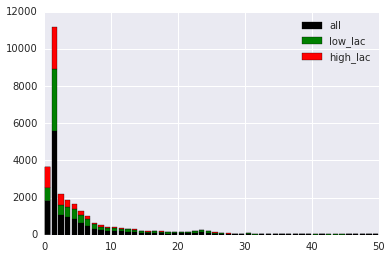

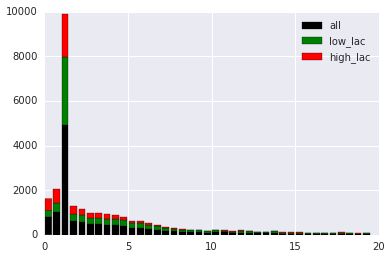

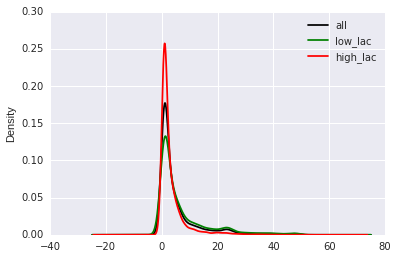

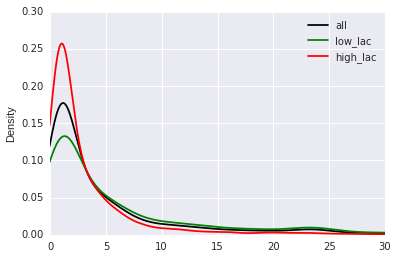

how often are lactates measured? - all:
count    14544.000000
mean         5.511476
std          8.236467
min          0.016667
25%          1.000000
50%          1.883333
75%          6.000000
max         49.983333
dtype: float64
how often are lactates measured? - high lactate:
count    14544.000000
mean         5.511476
std          8.236467
min          0.016667
25%          1.000000
50%          1.883333
75%          6.000000
max         49.983333
dtype: float64
how often are lactates measured? - low lactate:
count    14544.000000
mean         5.511476
std          8.236467
min          0.016667
25%          1.000000
50%          1.883333
75%          6.000000
max         49.983333
dtype: float64


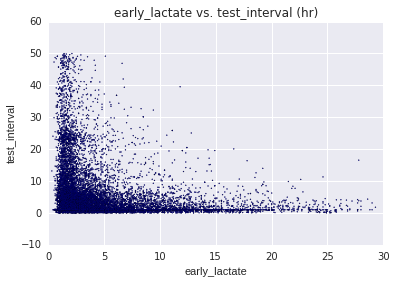

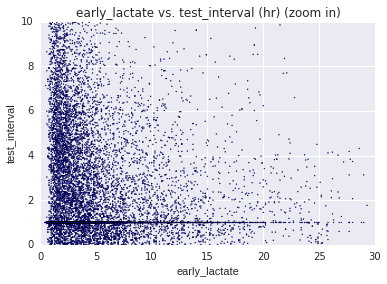

In [137]:
print 'patients had antibiotics before lactate clearance:'
filename1 = 'data_df2.3b.csv'
lactate_freq_analysis(filename1)

# print 'patients had antibiotics after lactate clearance:'
# filename2 = 'data_df2.3c.csv'
# lactate_freq_analysis(filename2)

# print "patients without antibiotics:"
# filename3 = 'data_df2.3a.csv'
# lactate_freq_analysis(filename3)